# Import library

In [1]:
# Data Loading
import xarray as xr  

# Data Processing
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Data Load

In [2]:
### Data Source
# https://psl.noaa.gov/cgi-bin/db_search/DBSearch.pl?Dataset=CDC+Derived+NCEP+Reanalysis+Products+Surface+Flux&group=0&submit=Search
# https://psl.noaa.gov/cgi-bin/db_search/DBSearch.pl?Dataset=CDC+Derived+NCEP+Reanalysis+Products+Pressure+Level&group=0&submit=Search

path_prate = './prate.sfc.mon.mean.nc'
path_uwnd = './uwnd.mon.1981-2010.ltm.nc'
path_vwnd = './vwnd.mon.1981-2010.ltm.nc'
path_omega = './omega.mon.1981-2010.ltm.nc'

prate_nc = xr.open_dataset(path_prate)
uwnd_nc = xr.open_dataset(path_uwnd)
vwnd_nc = xr.open_dataset(path_vwnd)
omega_nc = xr.open_dataset(path_omega)

print(prate_nc) # print dataset infomation 
print(uwnd_nc) # print dataset infomation 
print(vwnd_nc) # print dataset infomation 
print(omega_nc) # print dataset infomation 

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 868)
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-04-01
Data variables:
    prate    (time, lat, lon) float32 ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121013
    history:        Mon Jul  5 23:55:54 1999: ncrcat prate.mon.mean.nc /Datas...
    title:          monthly mean prate.sfc from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...
<xarray.Dataset>
Dimensions:             (lat: 73, level: 17, lon: 144, nbnds: 2, time: 12)
Coordinates:
  * level               (level) float32 1000.0 925.0 850.0 ... 30.0 20.0 10.0
  * 

/usr/local/python/2.7/envs/p3.6_cpu/lib/python3.6/site-packages/xarray/coding/times.py:459: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/python/2.7/envs/p3.6_cpu/lib/python3.6/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/usr/local/python/2.7/envs/p3.6_cpu/lib/python3.6/site-packages/xarray/coding/times.py:459: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/python/2.7/envs/p3.6_cpu/l

# Data Processing

In [3]:
# select variable
prate = prate_nc.data_vars['prate']
uwnd = uwnd_nc.data_vars['uwnd']
vwnd = vwnd_nc.data_vars['vwnd']
omega = omega_nc.data_vars['omega']

print(prate.shape)
print(uwnd.shape)
print(vwnd.shape)
print(omega.shape)

(868, 94, 192)
(12, 17, 73, 144)
(12, 17, 73, 144)
(12, 12, 73, 144)


In [4]:
# Long Term Mean (Monthly Climatology)
prate_ltm = prate.groupby("time.month").mean("time")
print(prate_ltm.shape)

(12, 94, 192)


In [5]:
# select level (1000~100mb)
uwnd = uwnd.sel(level=slice(1000,100))
vwnd = vwnd.sel(level=slice(1000,100))
omega = omega.sel(level=slice(1000,100))

In [6]:
# zonal mean
prate_zm = prate_ltm.mean(dim=['lon'])
uwnd_zm = uwnd.mean(dim=['lon'])
vwnd_zm = vwnd.mean(dim=['lon'])
omega_zm = omega.mean(dim=['lon'])

print(prate_zm.shape)
print(uwnd_zm.shape)
print(vwnd_zm.shape)
print(omega_zm.shape)

(12, 94)
(12, 12, 73)
(12, 12, 73)
(12, 12, 73)


In [7]:
# scale
prate_zm = prate_zm * 86400
omega_zm = -omega_zm * 1e2

# Visualization

Text(0.5, 0, 'latitude')

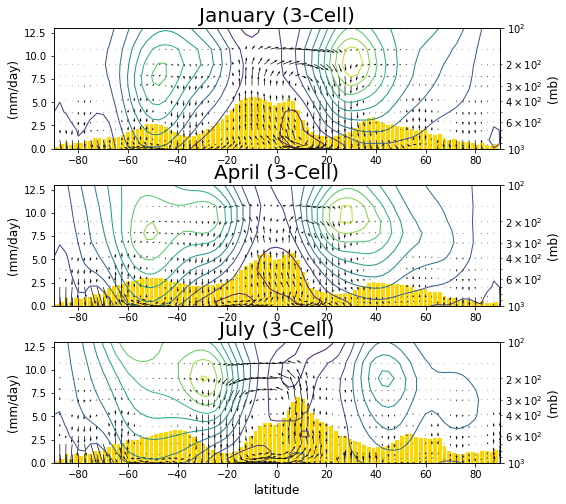

In [8]:
# set multiple figures 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)


# January
ax1.bar(prate_zm.lat, prate_zm.sel(month=1), width=1.5, color='gold') # select JAN
ax1.set_ylim(0,13)

ax1_ = ax1.twinx()   # to overlay multiple plots
xs_q, ys_q = np.meshgrid(vwnd_zm.lat, vwnd_zm.level)   # set vertor grid
ax1_.quiver(xs_q, ys_q, vwnd_zm.sel(time='0001-01')[0], omega_zm.sel(time='0001-01')[0], width=0.0015, scale=100, color='k')
ax1_.invert_yaxis()   # invert yaxis
ax1_.set_yscale('log')   # set log scale for yaxis

ax1_.contour(uwnd_zm.lat, uwnd_zm.level, uwnd_zm.sel(time='0001-01')[0], levels=10, linewidths=1.)
ax1.set_title('January (3-Cell)', fontsize=20)
ax1.set_ylabel('(mm/day)', fontsize=12); ax1_.set_ylabel('(mb)', fontsize=12) 


# April
ax2.bar(prate_zm.lat, prate_zm.sel(month=4),
       width=1.5, color='gold')
ax2.set_ylim(0,13)

ax2_ = ax2.twinx()   # to overlay multiple plots
xs_q, ys_q = np.meshgrid(vwnd_zm.lat, vwnd_zm.level)   # set vertor grid
ax2_.quiver(xs_q, ys_q, vwnd_zm.sel(time='0001-04')[0], omega_zm.sel(time='0001-04')[0], width=0.0015, scale=100, color='k')
ax2_.invert_yaxis()   # invert yaxis
ax2_.set_yscale('log')   # set log scale for yaxis

ax2_.contour(uwnd_zm.lat, uwnd_zm.level, uwnd_zm.sel(time='0001-04')[0], levels=10, linewidths=1.)
ax2.set_title('April (3-Cell)', fontsize=20)
ax2.set_ylabel('(mm/day)', fontsize=12); ax2_.set_ylabel('(mb)', fontsize=12) 


# July
ax3.bar(prate_zm.lat, prate_zm.sel(month=7),
       width=1.5, color='gold')
ax3.set_ylim(0,13)

ax3_ = ax3.twinx()   # to overlay multiple plots
xs_q, ys_q = np.meshgrid(vwnd_zm.lat, vwnd_zm.level)   # set vertor grid
ax3_.quiver(xs_q, ys_q, vwnd_zm.sel(time='0001-07')[0], omega_zm.sel(time='0001-07')[0], width=0.0015, scale=100, color='k')
ax3_.invert_yaxis()   # invert yaxis
ax3_.set_yscale('log')   # set log scale for yaxis

ax3_.contour(uwnd_zm.lat, uwnd_zm.level, uwnd_zm.sel(time='0001-07')[0], levels=10, linewidths=1.)
ax3_.set_title('July (3-Cell)', fontsize=20)
ax3.set_ylabel('(mm/day)', fontsize=12); ax3_.set_ylabel('(mb)', fontsize=12) 
ax3.set_xlabel('latitude', fontsize=12)

# Let's try to use function

In [9]:
def plot_3cell(ax, m):
    if m == 1: 
        time_sel, month_title = '0001-01', 'January'
    if m == 4: 
        time_sel, month_title = '0001-04', 'April'
    if m == 7: 
        time_sel, month_title = '0001-07', 'July'
        
    ax.bar(prate_zm.lat, prate_zm.sel(month=m), width=1.5, color='gold') # select month
    ax.set_ylim(0,13)

    ax_ = ax.twinx()   # to overlay multiple plots
    xs_q, ys_q = np.meshgrid(vwnd_zm.lat, vwnd_zm.level)   # set vertor grid
    ax_.quiver(xs_q, ys_q, vwnd_zm.sel(time=time_sel)[0], omega_zm.sel(time=time_sel)[0], width=0.0015, scale=100, color='k')
    ax_.invert_yaxis()   # invert yaxis
    ax_.set_yscale('log')   # set log scale for yaxis

    ax_.contour(uwnd_zm.lat, uwnd_zm.level, uwnd_zm.sel(time=time_sel)[0], levels=10, linewidths=1.)
    ax.set_title(month_title + ' (3-Cell)', fontsize=20)
    ax.set_ylabel('(mm/day)', fontsize=12); ax_.set_ylabel('(mb)', fontsize=12) 

In [ ]:
# set multiple figures 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plot_3cell(ax1, m=1)   # January
plot_3cell(ax2, m=4)   # April
plot_3cell(ax3, m=7)   # July